In [0]:
import urllib.request
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1720041126000


In [0]:
################## Part A Q3 #################

my_rdd = spark.sparkContext.textFile("dbfs:/kdd/kddcup_data.gz")
#print 10 values of the RDD
ten_values = my_rdd.collect()[:10]
for row in ten_values:
    print(row)
from pyspark.rdd import RDD
#verify the type of data structure
if isinstance(my_rdd, RDD):
    print("the data structure is RDD")

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

In [0]:
################## Part A Q4 #################
from pyspark.sql import Row

#define the column from http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
column_titles = ["duration", "protocol_type", "service","flag","src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_hot_login", "is_guest_login", "count", "serror_rate", "rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_count", "srv_serror_rate", "srv_rerror_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate","label"]

# Split the rows by the comma
split_data = my_rdd.map(lambda row: row.split(","))

split_df = split_data.toDF(column_titles)
print("The total number of columns are: " + str(len(split_df.columns)))
#print result
split_df.show()

The total number of columns are: 42
+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+------------+--------------+-----+-----------+-----------+-------------+-------------+---------+---------------+---------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_hot_login|is_guest_login|count|serror_rate|rerror_rate|same_srv_rate|diff_srv_rate|srv_count|srv_serror_rate|srv_rerr

In [0]:
################## Part A Q5 #################
df_6 = split_df[["duration", "protocol_type", "service", "src_bytes","dst_bytes", "flag" , "label"]]
df_6.printSchema()
df_6.show(10)

root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)

+--------+-------------+-------+---------+---------+----+-------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag|  label|
+--------+-------------+-------+---------+---------+----+-------+
|       0|          tcp|   http|      181|     5450|  SF|normal.|
|       0|          tcp|   http|      239|      486|  SF|normal.|
|       0|          tcp|   http|      235|     1337|  SF|normal.|
|       0|          tcp|   http|      219|     1337|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      212|     1940|  SF|normal.|
|       0|          tcp|   http|      159|     4087|  S

+-------------+------+
|protocol_type| count|
+-------------+------+
|          udp| 20354|
|          tcp|190065|
|         icmp|283602|
+-------------+------+



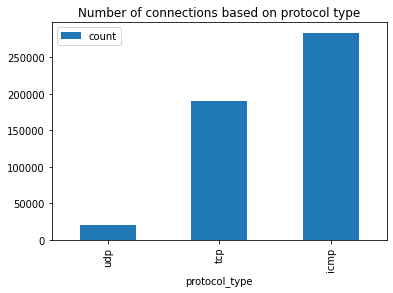

+-----------+-----+
|    service|count|
+-----------+-----+
|     tftp_u|    1|
|    pm_dump|    1|
|      red_i|    1|
|      tim_i|    7|
|        X11|   11|
|      urh_i|   14|
|        IRC|   43|
|     Z39_50|   92|
|    netstat|   95|
|        ctf|   97|
|       name|   98|
|     kshell|   98|
|       exec|   99|
|netbios_dgm|   99|
|   http_443|   99|
|       ldap|  101|
|      pop_2|  101|
|       link|  102|
| netbios_ns|  102|
|    daytime|  103|
+-----------+-----+
only showing top 20 rows



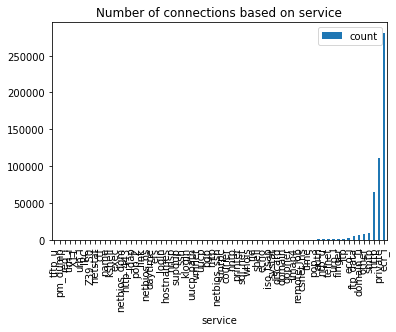

In [0]:
################## Part A Q6 #################
import matplotlib.pyplot as plt
import pandas as pd

#count the connections based on protocol type
protocol_count = df_6.groupBy("protocol_type").count()
#ascending order
protocol_count = protocol_count.orderBy("count",ascending=True)
protocol_count.show()

# bar plot
protocol_pd = protocol_count.toPandas()
protocol_pd.plot(kind='bar',
        x='protocol_type',
        y='count')
# set the title
plt.title('Number of connections based on protocol type')
# show the plot
plt.show()


#count the connections based on service
service_count = df_6.groupBy("service").count()
#ascending order
service_count = service_count.orderBy("count",ascending=True)
service_count.show()

# bar plot
service_pd = service_count.toPandas()
service_pd.plot(kind='bar',
        x='service',
        y='count')
# set the title
plt.title('Number of connections based on service')
# show the plot
plt.show()




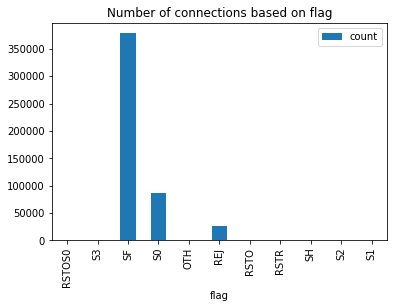

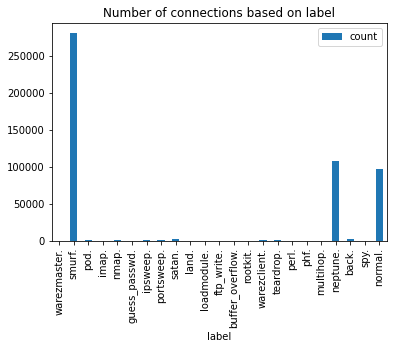

+--------+------+
|duration| count|
+--------+------+
|       0|481671|
|       1|  2476|
|       2|   870|
|       3|   625|
|       5|   554|
|    2630|   496|
|       4|   413|
|      14|   322|
|      10|   194|
|       7|   169|
+--------+------+
only showing top 10 rows



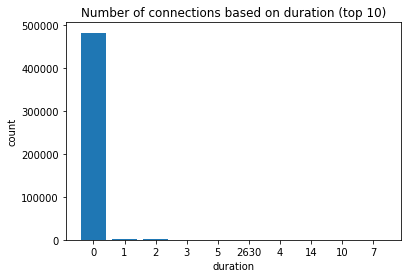

In [0]:
################## Part A Q7 #################
#count the connections based on Flag
flag_count = df_6.groupBy("flag").count()

# bar plot
flag_pd = flag_count.toPandas()
flag_pd.plot(kind='bar',
        x='flag',
        y='count')
# set the title
plt.title('Number of connections based on flag')
# show the plot
plt.show()

#count the connections based on label
label_count = df_6.groupBy("label").count()

# bar plot
label_pd = label_count.toPandas()
label_pd.plot(kind='bar',
        x='label',
        y='count')
# set the title
plt.title('Number of connections based on label')
# show the plot
plt.show()

#count the connections based on duration
df_6=df_6.withColumn("duration",df_6.duration.cast('int'))
duration_count = df_6.groupBy("duration").count()
duration_count = duration_count.orderBy("count",ascending=False)
duration_count.show(10)
duration_count = duration_count.head(10)

# plot
x = []
for i in range(10):
    x.append(str(duration_count[i][0]))
y = []
for i in range(10):
    y.append(duration_count[i][1])
plt.bar(x,y)
plt.xlabel("duration")
plt.ylabel("count")

plt.title('Number of connections based on duration (top 10)')
# show the plot
plt.show()

In [0]:
################## Part A Q8 #################
from pyspark.sql.functions import when
from pyspark.ml.feature import StringIndexer,IndexToString
from pyspark.ml.feature import VectorAssembler
#change the label column to "normal" and "attack"
relabel_df = df_6.withColumn(
    'label',
    when(
        df_6.label.contains('normal') == False, 'attack', 
    ).otherwise('normal')
)
relabel_df.groupBy("label").count().show()

#change protocol_type,service, flag, label from string to index
#e.g. label-normal = 1, label-attack = 2
protocol_indexer = StringIndexer(inputCol = 'protocol_type', outputCol = 'protocol_type_index')
service_indexer = StringIndexer(inputCol = 'service', outputCol = 'service_index')
flag_indexer = StringIndexer(inputCol = 'flag', outputCol = 'flag_index')
label_indexer = StringIndexer(inputCol = 'label', outputCol = 'label_index')

indexed_df = protocol_indexer.fit(relabel_df).transform(relabel_df)
indexed_df = service_indexer.fit(indexed_df).transform(indexed_df)
indexed_df = flag_indexer.fit(indexed_df).transform(indexed_df)
indexed_df = label_indexer.fit(indexed_df).transform(indexed_df)

indexed_df = indexed_df.drop("protocol_type", "service", 'flag', 'label')
# indexed_df.show()

#convert data into vector form
indexed_df=indexed_df.withColumn("src_bytes",indexed_df.src_bytes.cast('int'))
indexed_df=indexed_df.withColumn("dst_bytes",indexed_df.dst_bytes.cast('int'))
vector_assembler = VectorAssembler(
    inputCols = ['duration', 'src_bytes', 'dst_bytes', 'protocol_type_index', 'service_index', 'flag_index'],
    outputCol = "input_features"
)
data_vector = vector_assembler.transform(indexed_df).drop('duration', 'src_bytes', 'dst_bytes', 'protocol_type_index', 'service_index', 'flag_index')
# data_vector.show()
#split the data into train/test set
train, test = data_vector.randomSplit([0.7,0.3])

# Use linear SVC which supports vector machines
from pyspark.ml.classification import LinearSVC
svc = LinearSVC(featuresCol="input_features", labelCol="label_index")
svc_model = svc.fit(train)


prediction = svc_model.transform(test)
accuracy = prediction.filter(prediction["label_index"] == prediction["prediction"]).count()/prediction.count()
print("the model has accuracy: ", accuracy)


+------+------+
| label| count|
+------+------+
|normal| 97278|
|attack|396743|
+------+------+

the model has accuracy:  0.9769717282015244
